## Aula 03: Predição

- decomposição na mão
- autocorrelação

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
sns.set()
plt.rcParams["figure.figsize"] = (18, 5)

In [3]:
df = pd.read_csv("data/airline_passengers.csv")
data = df["Passengers"]
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

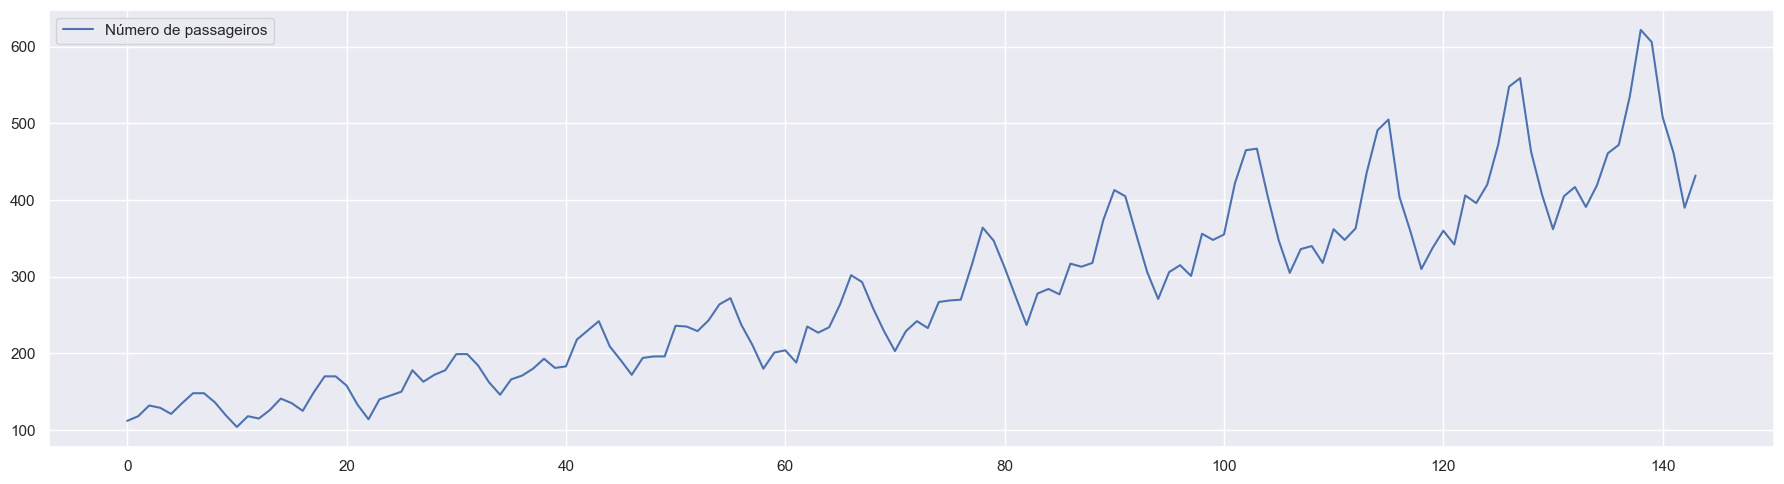

In [4]:
plt.plot(data, label="Número de passageiros")
plt.legend()
plt.tight_layout()
plt.show()

## Decomposição: na mão

1. Identificar período da sazonalidade
2. Isolar tendência
3. Isolar sazonalidade + ruído
4. Isolar sazonalidade
5. Isolar ruído

## Caso 01: supondo que seja aditivo

### 1. Identificar período da sazonalidade
#### Solução: autocorrelação!

In [5]:
diff = np.diff(data)
diff

array([   6,   14,   -3,   -8,   14,   13,    0,  -12,  -17,  -15,   14,
         -3,   11,   15,   -6,  -10,   24,   21,    0,  -12,  -25,  -19,
         26,    5,    5,   28,  -15,    9,    6,   21,    0,  -15,  -22,
        -16,   20,    5,    9,   13,  -12,    2,   35,   12,   12,  -33,
        -18,  -19,   22,    2,    0,   40,   -1,   -6,   14,   21,    8,
        -35,  -26,  -31,   21,    3,  -16,   47,   -8,    7,   30,   38,
         -9,  -34,  -30,  -26,   26,   13,   -9,   34,    2,    1,   45,
         49,  -17,  -35,  -38,  -37,   41,    6,   -7,   40,   -4,    5,
         56,   39,   -8,  -50,  -49,  -35,   35,    9,  -14,   55,   -8,
          7,   67,   43,    2,  -63,  -57,  -42,   31,    4,  -22,   44,
        -14,   15,   72,   56,   14, -101,  -45,  -49,   27,   23,  -18,
         64,  -10,   24,   52,   76,   11,  -96,  -56,  -45,   43,   12,
        -26,   28,   42,   11,   63,   87,  -16,  -98,  -47,  -71,   42],
      dtype=int64)

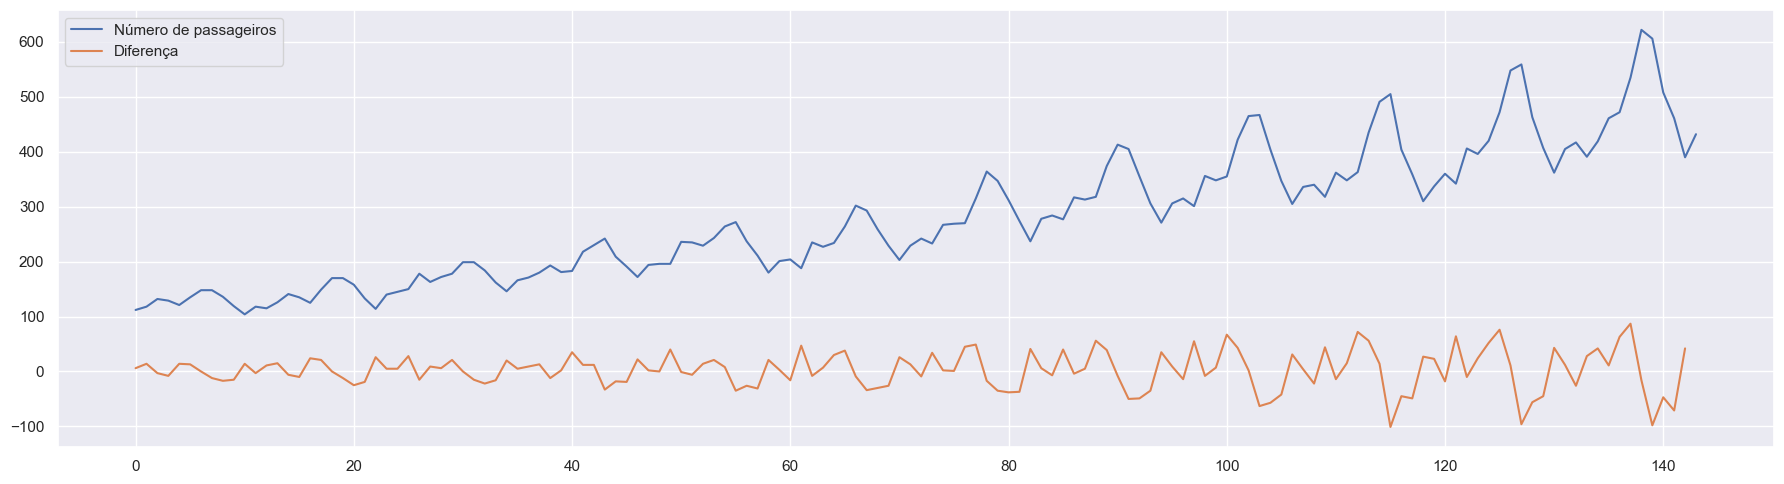

In [6]:
plt.plot(data, label="Número de passageiros")
plt.plot(diff, label="Diferença")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

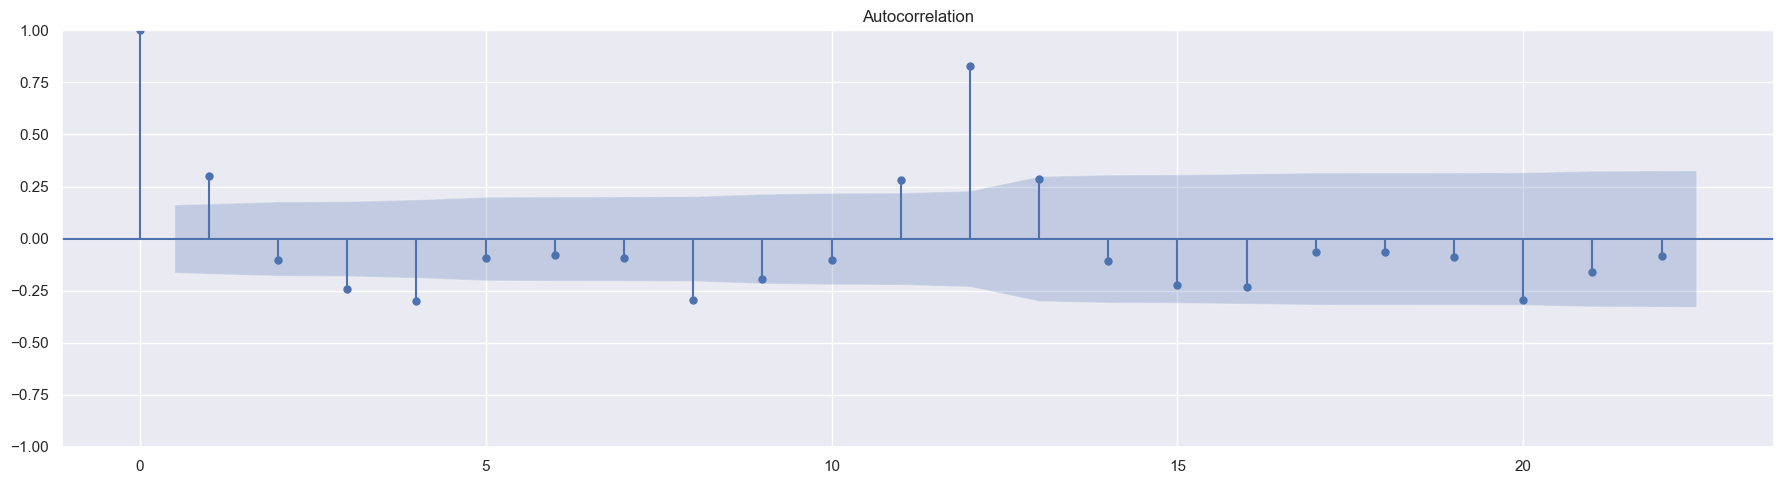

In [8]:
plot_acf(diff)
plt.tight_layout()
plt.show()

In [9]:
period = 12

### 2. Isolar tendência

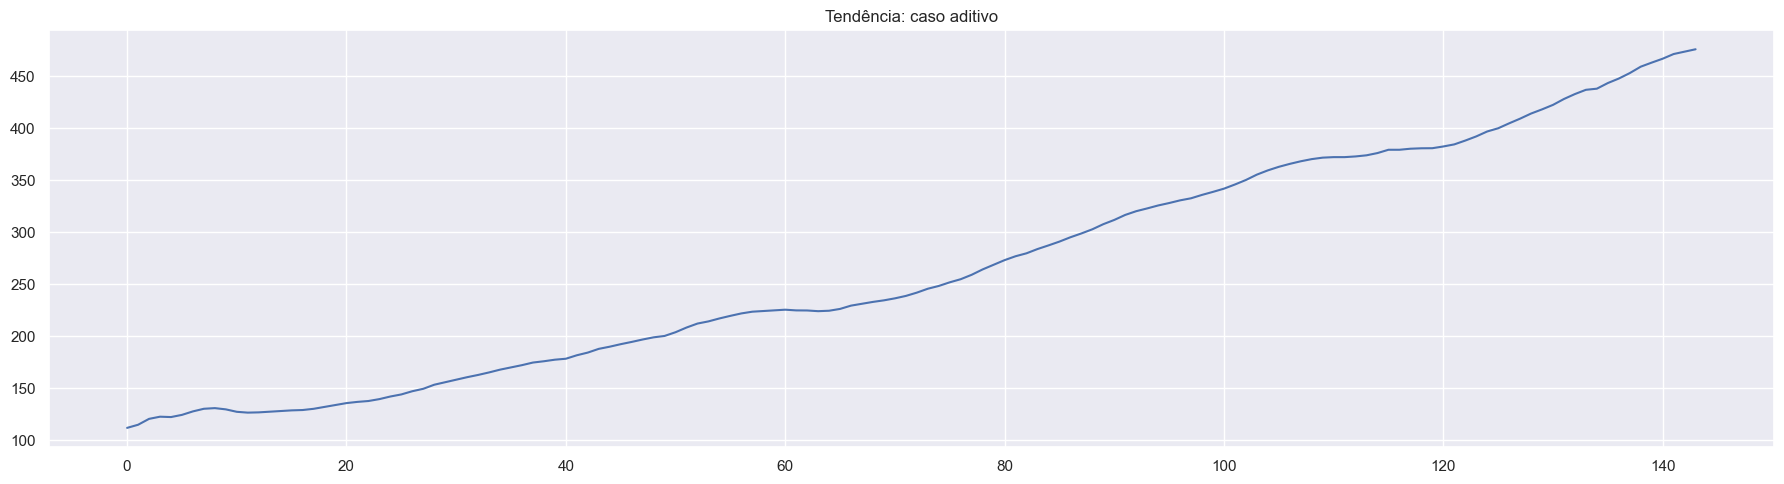

In [10]:
t_add = data.rolling(window=period, min_periods=1).mean()

plt.plot(t_add)
plt.title("Tendência: caso aditivo")
plt.tight_layout()
plt.show()

### 3. Isolar sazonalidade + ruído

$$
Y = t + s + r
$$

$$
s + r = Y - t
$$

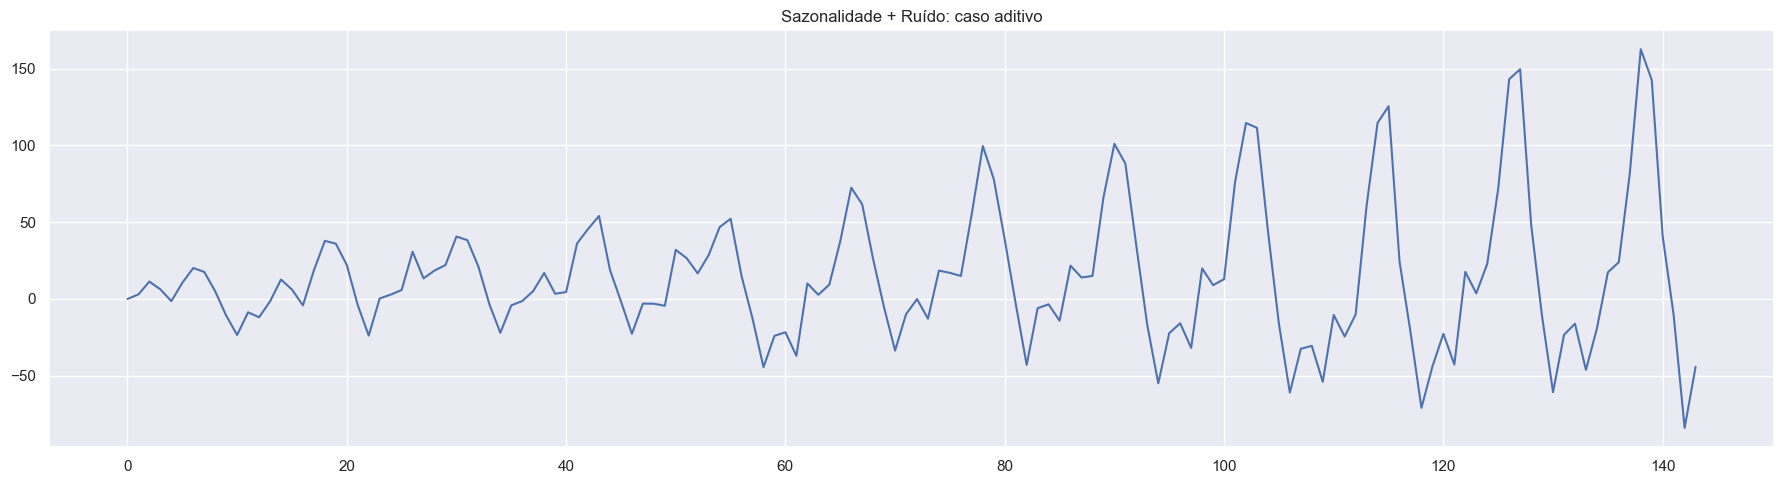

In [11]:
sr_add = data - t_add

plt.plot(sr_add)
plt.title("Sazonalidade + Ruído: caso aditivo")
plt.tight_layout()
plt.show()

### 4. Isolar sazonalidade

In [12]:
seg_size = int(np.floor(data.shape[0] / period))
seg_size

12

In [13]:
s_part = [np.mean([data[j + i*period] for i in range(seg_size)]) for j in range(period)]

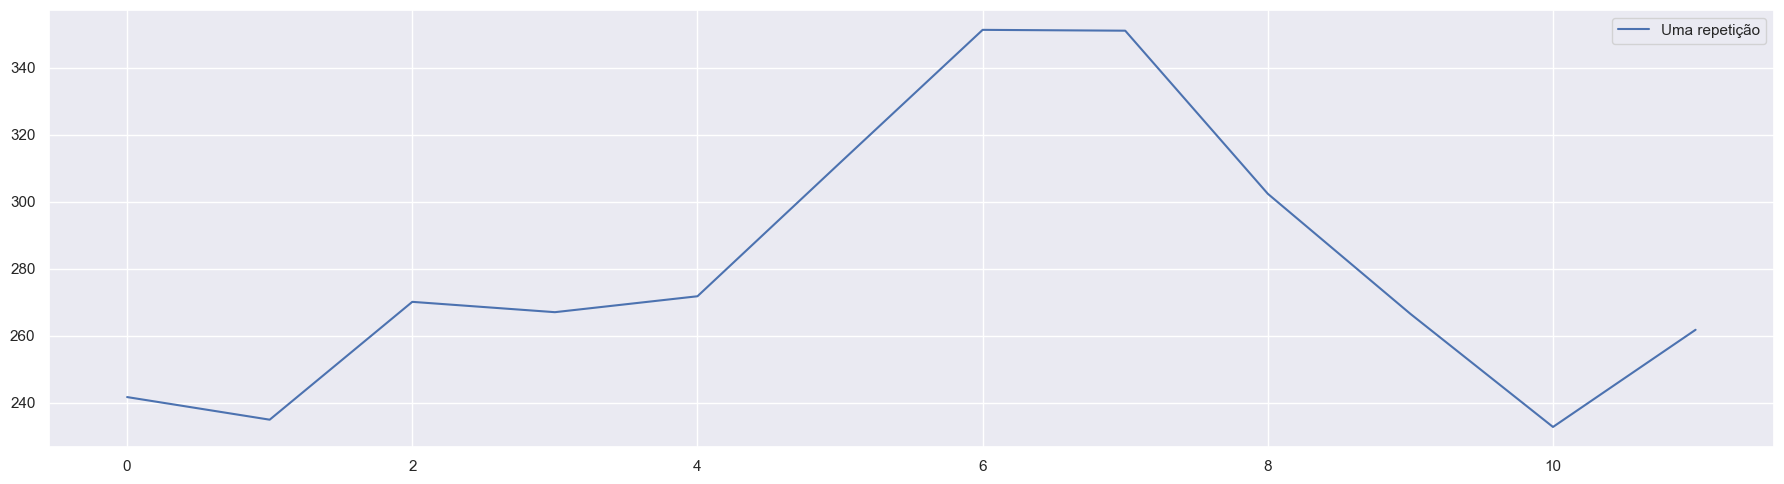

In [14]:
plt.plot(s_part, label="Uma repetição")
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
s_add = np.tile(s_part, seg_size+1)
s_add = s_add[:data.shape[0]]

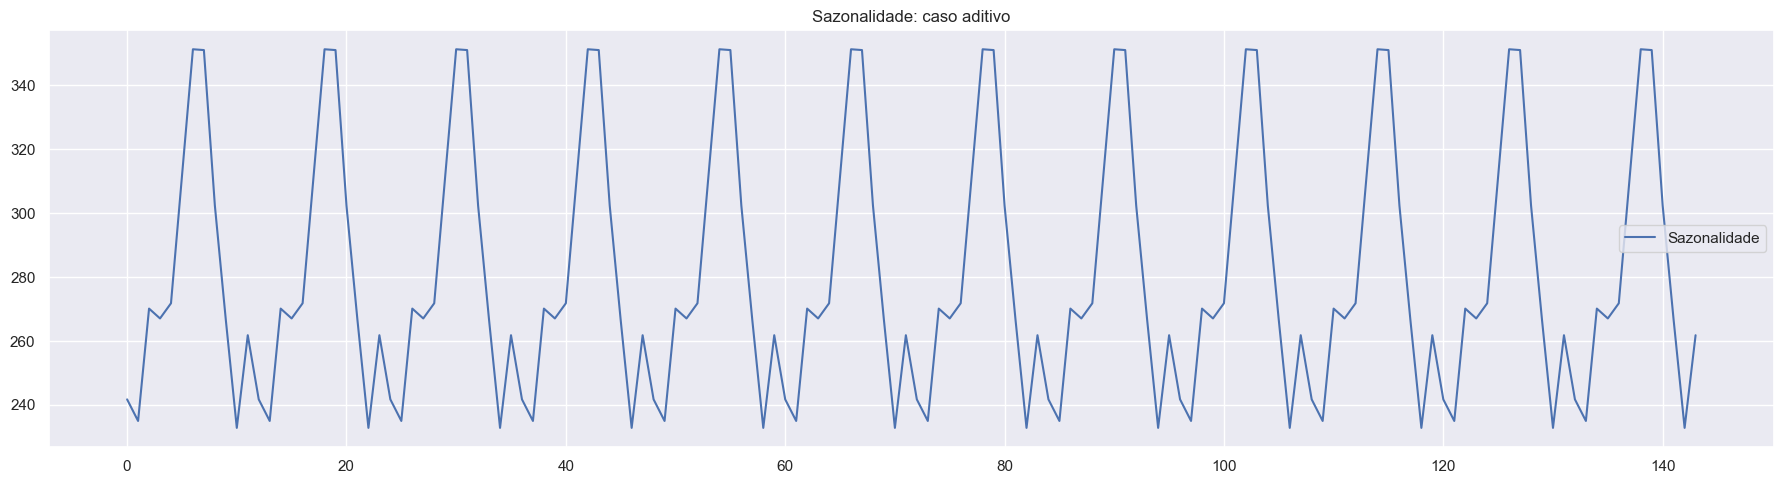

In [16]:
plt.plot(s_add, label="Sazonalidade")
plt.title("Sazonalidade: caso aditivo")
plt.legend()
plt.tight_layout()
plt.show()

### 5. Isolar ruído

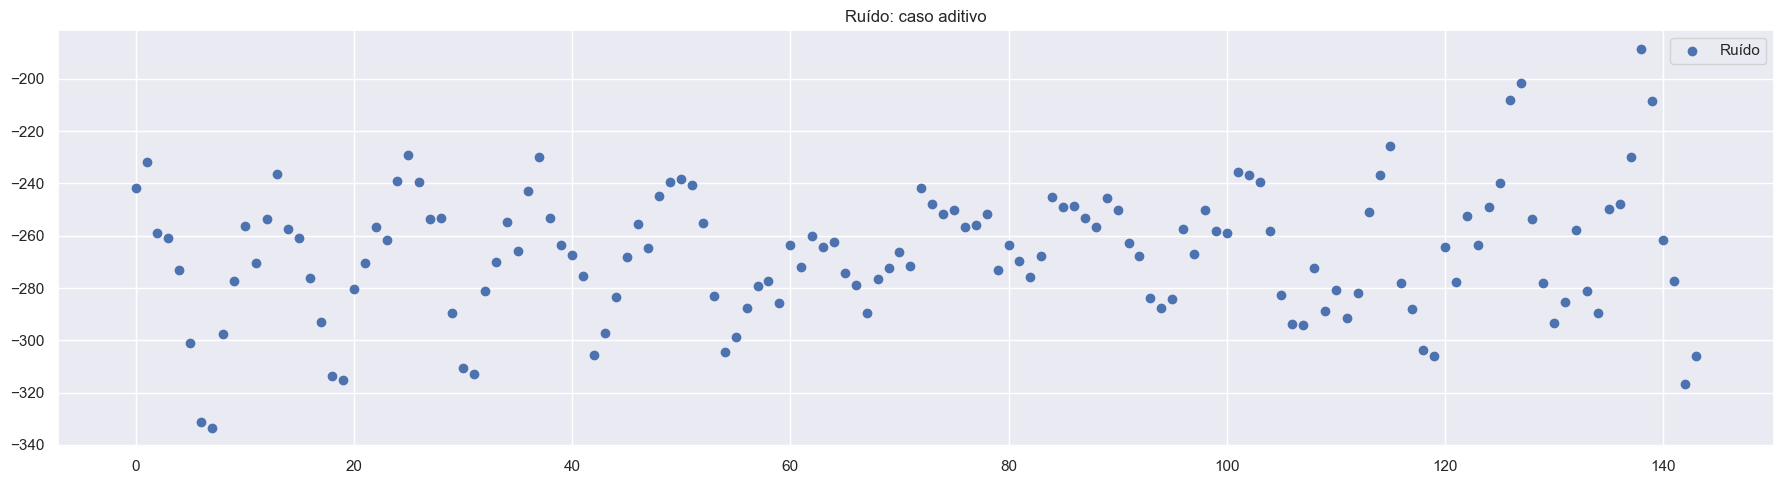

In [17]:
r_add = sr_add - s_add

plt.scatter(range(r_add.shape[0]), r_add, label="Ruído")
plt.title("Ruído: caso aditivo")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
print(f"Variância do ruído para o caso aditivo: {np.var(r_add)}")

Variância do ruído para o caso aditivo: 593.8749324727687


## Caso 02: Repetindo, agora para o caso multiplicativo

In [19]:
t_mult = data.rolling(window=period, min_periods=1).mean()

sr_mult = data / t_mult

r_mult = sr_mult / s_add

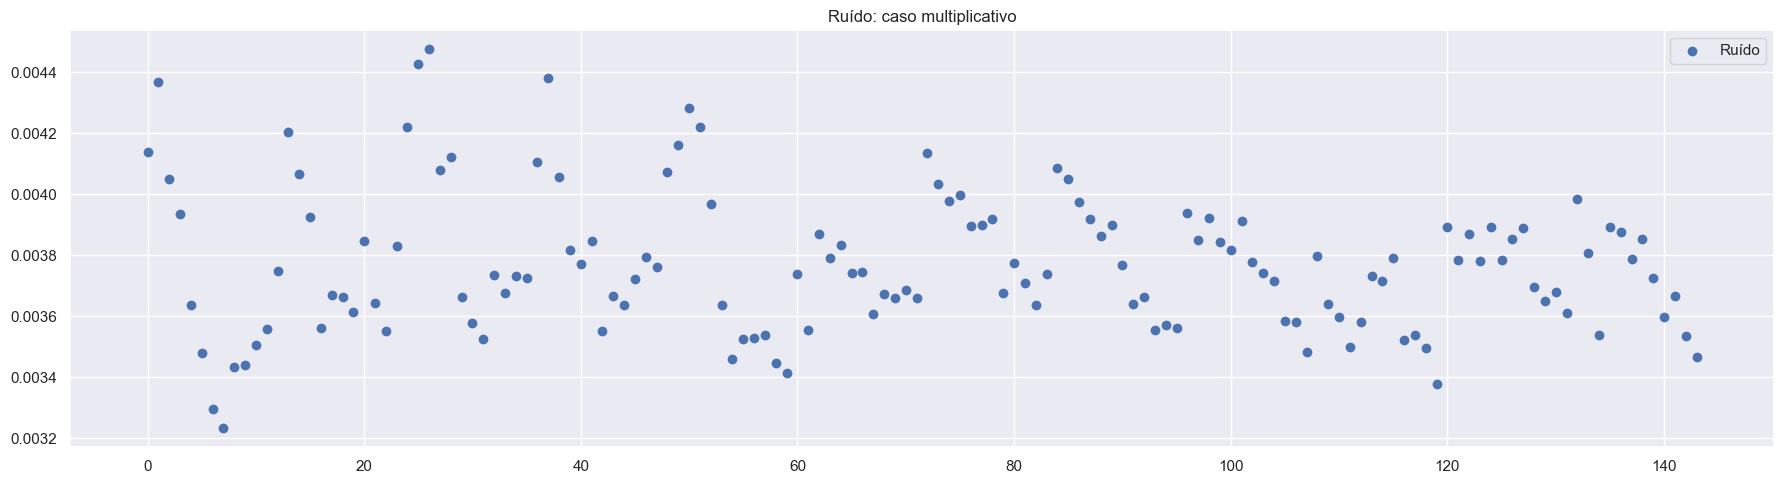

In [20]:
plt.scatter(range(r_mult.shape[0]), r_mult, label="Ruído")
plt.title("Ruído: caso multiplicativo")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
print(f"Variância do ruído para o caso multiplicativo: {np.var(r_mult)}")

Variância do ruído para o caso multiplicativo: 5.2311579243083216e-08


## Conferindo com `seasonal_decompose`

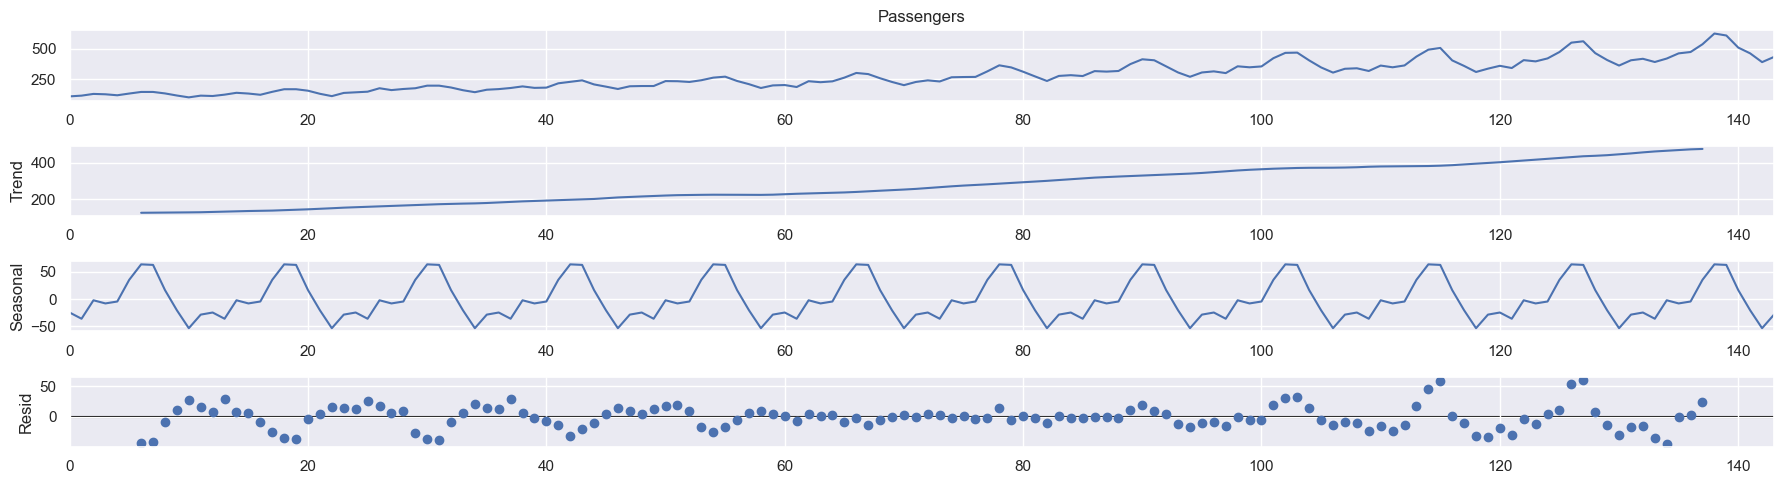

In [22]:
result_add = seasonal_decompose(data, model="additive", period=12)

result_add.plot()
plt.tight_layout()
plt.show()

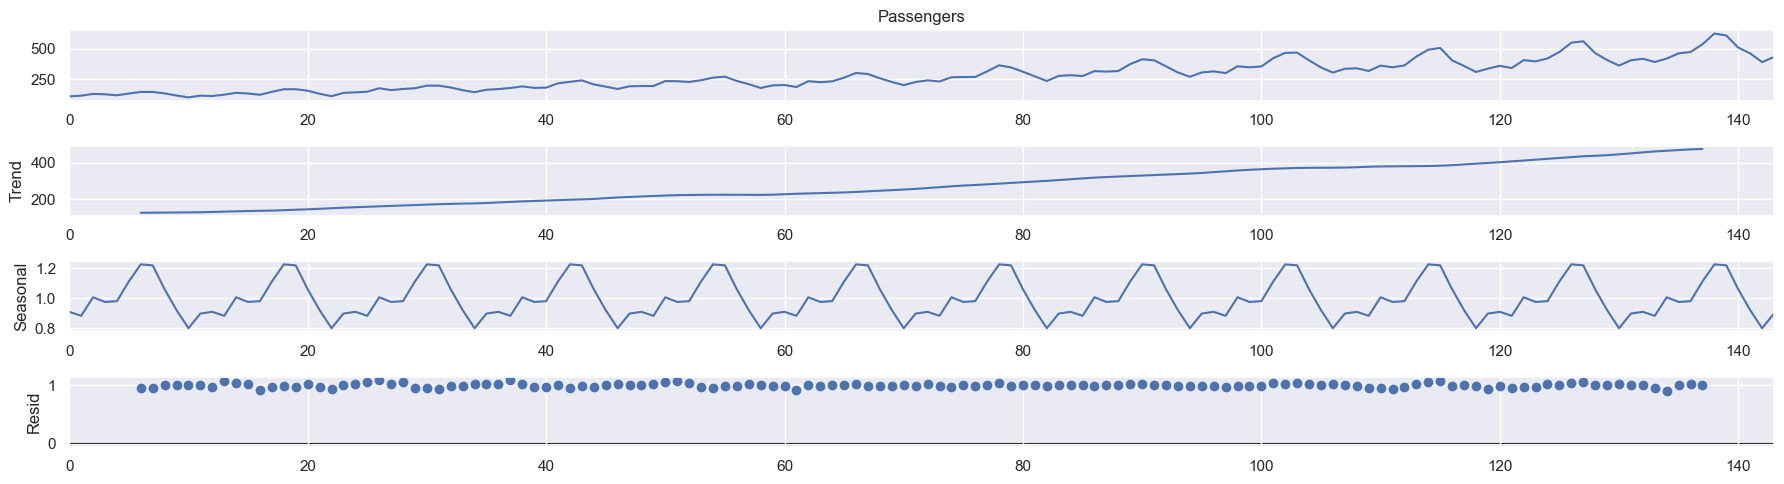

In [23]:
result_mult = seasonal_decompose(data, model="multiplicative", period=12)

result_mult.plot()
plt.tight_layout()
plt.show()